Model 1

In [2]:
import pandas as pd
df=pd.read_csv("/content/Customer_Segmentation.csv")
print(df.columns)

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


Finding the unique elements

In [3]:
df['Sub_Category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [4]:
df['Unit_Price'].unique()

array([ 120,  159,   10,    5,    9,    8,   22,   24,   35,   55,   54,
         50, 3400, 3375, 2320, 2295,  769,  565,  540, 3578, 1701, 2443,
       1120,  783,   70,    2,   25,    4,   21,   29,   30,   33, 2384,
        742, 1215,   64])


Pre-trained model(Model Building)

In [5]:
from fastai.tabular.all import *
import pandas as pd

#fastai deep learning library

df = pd.read_csv("/content/Customer_Segmentation.csv")


target = 'Product_Category' #target columns
cat_names = ['Sub_Category'] #categorical column
cont_names = ['Order_Quantity', 'Revenue', 'Profit'] #continous numbers value


procs = [Categorify, FillMissing, Normalize] # preprocessing steps , convert category to numeric, handles missing values,


to = TabularPandas(df,  procs=procs, cat_names=cat_names, cont_names=cont_names,y_names=target, splits=RandomSplitter(seed=42)(range_of(df)))
#with tabular pandas special function it splits the data as two sets

# dataloader training process more efficient
dls = to.dataloaders(bs=64)

# Define and train the learner
learn = tabular_learner(dls, layers=[200, 100], metrics=accuracy)
learn.fit_one_cycle(5)

# Save the trained model
learn.save('product_category_model')

epoch,train_loss,valid_loss,accuracy,time
0,0.000292,0.002174,0.999956,00:14
1,0.000091,0.000614,0.999956,00:14
2,0.000000,0.000120,0.999956,00:14
3,0.000000,0.000085,0.999956,00:13
4,0.000000,0.000407,0.999956,00:13


Path('models/product_category_model.pth')

Model 2

In [6]:
import pandas as pd
df2=pd.read_csv("/content/store dataset.csv", encoding='ISO-8859-1') #special characters are prevented
print(df2.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Product_Category',
       'Sub_Category', 'Product Name', 'Revenue', 'Order_Quantity', 'Discount',
       'Profit'],
      dtype='object')


Model 1 saved

In [7]:
learn.save('product_category_model') # load the saved model weights into an existing Learner object.

Path('models/product_category_model.pth')

In [8]:
import pandas as pd

# Load the second dataset
df2 = pd.read_csv("/content/store dataset.csv",  encoding='ISO-8859-1')

# Use same settings as model 1
procs = [Categorify, FillMissing, Normalize]

cat_names = ['Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
cont_names = ['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']

# Dummy target for training continuation
df2['Target'] = 'Product_Category'

target = 'Product_Category'
cat_names = ['Sub_Category']
cont_names = ['Order_Quantity', 'Revenue', 'Profit']

Training the Model 2

In [9]:
from fastai.tabular.all import *

to2 = TabularPandas(df2, procs=procs, cat_names=cat_names, cont_names=cont_names, y_names='Product_Category')
dls2 = to2.dataloaders()

learn = tabular_learner(dls2, metrics=accuracy, path=Path('.'))  # or set path if needed

In [10]:
learn.save('product_category_model')

Path('models/product_category_model.pth')

In [11]:
learn.load('product_category_model')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:67: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


In [12]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.233302,None,None,00:01


/usr/local/lib/python3.11/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,accuracy,time
0,0.005100,None,None,00:01
1,0.003137,None,None,00:01
2,0.002157,None,None,00:01
3,0.000293,None,None,00:01
4,0.000178,None,None,00:01


/usr/local/lib/python3.11/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/usr/local/lib/python3.11/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/usr/local/lib/python3.11/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/usr/local/lib/python3.11/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/usr/local/lib/python3.11/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


Clustering

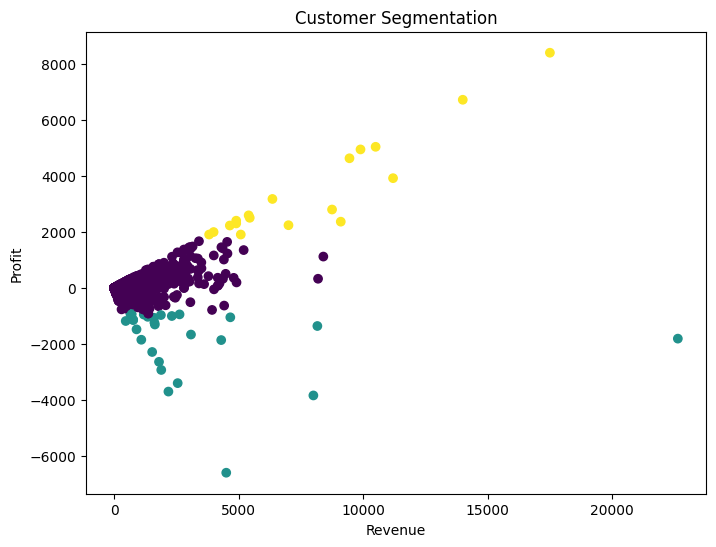

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

column_name = 'Revenue'
data = df2[[column_name]]

column_name2 = 'Profit'
data = df2[[column_name2]]

kmeans = KMeans(n_clusters=3)
df2['cluster'] = kmeans.fit_predict(data)

plt.figure(figsize=(8,6))
plt.scatter(df2[column_name], df2[column_name2],c=df2['cluster'], cmap='viridis')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.title('Customer Segmentation')
plt.show()

In [14]:
# After loading and preparing the dataset (df2)
X_model_ready = to2.train.xs  # Model-ready inputs (processed, scaled, encoded)


Dimension Reduction

In [15]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_model_ready)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

/tmp/ipython-input-16-1001542599.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


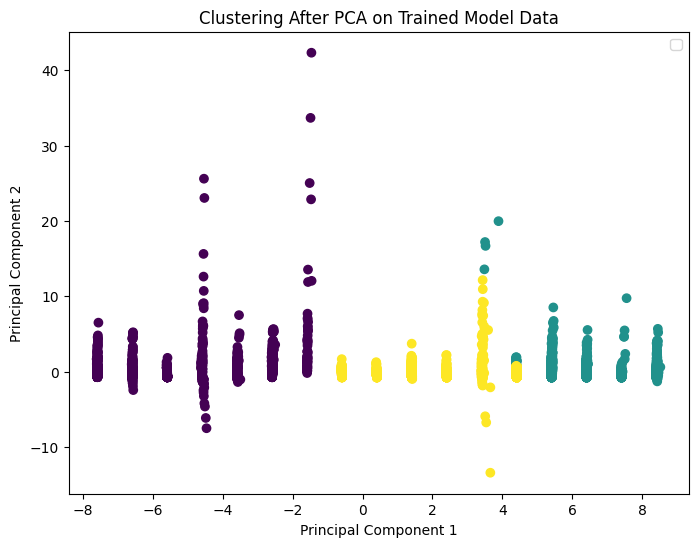

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(X_pca)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
#sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster',palette='Set2')
plt.title("Clustering After PCA on Trained Model Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()



Accuracy for Model 1

In [17]:
from fastai.tabular.all import *
# Fresh model without pre-trained weights
learn_fresh = tabular_learner(dls, metrics=accuracy)
learn_fresh.fit(5)

# Get baseline accuracy
accuracy_before = learn_fresh.validate()[1]
print(f"Accuracy BEFORE transfer learning:{accuracy_before:}")



epoch,train_loss,valid_loss,accuracy,time
0,0.000045,0.003229,0.999956,00:13
1,0.000000,0.002169,0.999956,00:13
2,0.004039,0.000007,1.000000,00:13
3,0.000000,0.000000,1.000000,00:13
4,0.000000,0.002843,0.999956,00:13


Accuracy BEFORE transfer learning:0.9999557733535767


Accuracy for model 2

In [18]:
from fastai.tabular.all import *

# Example dataframe setup
dls = TabularDataLoaders.from_df(
    df,  # your dataframe
    procs=[Categorify, FillMissing, Normalize],
    cat_names=['Sub_Category'],         # replace with your categorical columns
    cont_names=['Order_Quantity', 'Profit', 'Revenue'],  # replace with your continuous columns
    y_names='Product_Category',         # your target column
    valid_idx=range(len(df) - 200, len(df)),  # 200 rows as validation
    bs=64
)
learn = tabular_learner(dls, metrics=accuracy)
learn.fit(5)
val_loss, val_acc = learn.validate()
print(f"Validation Accuracy: {val_acc:.4f}")

epoch,train_loss,valid_loss,accuracy,time
0,0.000044,0.000000,1.000000,00:21
1,0.000001,0.000000,1.000000,00:14
2,0.000016,0.000000,1.000000,00:14
3,0.000000,0.000000,1.000000,00:14
4,0.000000,0.000000,1.000000,00:14


Validation Accuracy: 1.0000


In [19]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit(5)  # Train for 5 epochs (adjust as needed)

# This returns [validation_loss, accuracy]
val_loss, val_acc = learn.validate()

# Print accuracy
print(f"Accuracy AFTER training: {val_acc:.4f}")


epoch,train_loss,valid_loss,accuracy,time
0,0.000006,0.000000,1.000000,00:15
1,0.000000,0.000000,1.000000,00:14
2,0.000014,0.000000,1.000000,00:14
3,0.000004,0.000000,1.000000,00:14
4,0.000000,0.000000,1.000000,00:14


Accuracy AFTER training: 1.0000


In [22]:
learn.load('product_category_model')  # or your actual saved model name

dls2 = TabularDataLoaders.from_df(
    df2,  # your model 2 dataframe
    procs=[Categorify, FillMissing, Normalize],
    cat_names=cat_names,
    cont_names=cont_names,
    y_names='Product_Category',   # or whatever target column you're using
    valid_idx=range(len(df2)-200, len(df2)),  # define validation set
    bs=64
)
learn.dls = dls2

val_loss, val_acc = learn.validate()
print(f"Model Accuracy: {val_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:67: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Model Accuracy: 0.4700
